<a href="https://colab.research.google.com/github/gichurejoy/Machine-Learning/blob/main/labmetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%ls

drive/  sample_data/


In [22]:
import pandas as pd
df_main=pd.read_csv('/content/drive/MyDrive/data_B.csv')
df_main.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,Not Portable
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,Portable
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,Not Portable
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,Not Portable
4,6.615350,179.240661,26392.863612,9.309160,NaN,496.363562,12.786595,78.262369,4.453443,Portable


In [23]:
df=df_main.copy()
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,Not Portable
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,Portable
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,Not Portable
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,Not Portable
4,6.615350,179.240661,26392.863612,9.309160,NaN,496.363562,12.786595,78.262369,4.453443,Portable


In [24]:
print(df.dtypes)
print('----'*10)
print(df.isnull().sum())
print('----'*10)

print(df.shape)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability          object
dtype: object
----------------------------------------
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
----------------------------------------
(3276, 10)


In [25]:
df.fillna(df.mean(),inplace=True)
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [26]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,Not Portable
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,Portable
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,Not Portable
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,Not Portable
4,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443,Portable


In [27]:
df['Potability']=df['Potability'].map({'Portable':1,'Not Portable':0})
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634,0
1,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198,1
2,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969,0
3,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0
4,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443,1


In [28]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [41]:
import random
ts=(random.randint(2,70))/100
rs=random.randint(1,50)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=ts,random_state=rs)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [44]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
print(cm)

[[32  9]
 [16  9]]


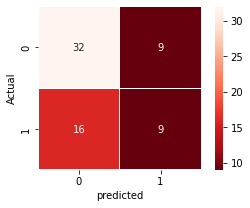

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d',linewidths=0.5,square=True,cmap='Reds_r')
plt.ylabel('Actual')
plt.xlabel('predicted')
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        41
           1       0.50      0.36      0.42        25

    accuracy                           0.62        66
   macro avg       0.58      0.57      0.57        66
weighted avg       0.60      0.62      0.61        66

